In [1]:
import os
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import shapefile
import pandas as pd
import seaborn as sns
from scipy import stats 
import scipy
from scipy.special import factorial
import math
from cleanData import getCleanTripData, getCleanFareData, mergeHashedData, getHashedData

In [2]:
print("Stared.")
trip = pd.read_csv('./data/trip_data_4.csv', skipinitialspace=True, dtype={"rate_code": int, "passenger_count": int,"store_and_fwd_flag": str})
fare = pd.read_csv('./data/trip_fare_4.csv', skipinitialspace=True)
    

Stared.


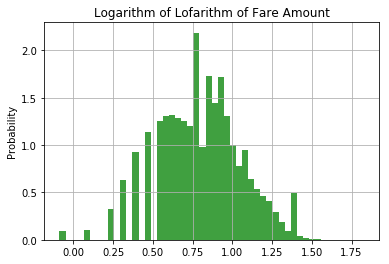

In [17]:
# Later on I got to idea of de-skewing the predicted variables
# Did not try that for prediction models, but would try if have more time.
# Kind of strange to see some bins empty.

ta = np.log(np.log(np.array(fare.fare_amount)))
plt.hist(ta, bins=50, normed=True, facecolor='green', alpha=0.75)
plt.ylabel('Probability')
plt.title('Logarithm of Lofarithm of Fare Amount')
plt.grid(True)

In [3]:
print("Stared.")
#Create a new hash_id
start = time.time()
b = fare['medallion'] + fare['hack_license'] + fare['pickup_datetime']
c = trip['medallion'] + trip['hack_license'] + trip['pickup_datetime']
fare['id'] = b
trip['id'] = c
end = time.time()
print("Took time {}".format(end-start))


ids = fare["id"]
dups = fare[ids.isin(ids[ids.duplicated()])]
fare = fare[~ids.isin(ids[ids.duplicated()])]

idst = trip["id"]
dupst = trip[idst.isin(idst[idst.duplicated()])]
trip = trip[~idst.isin(idst[idst.duplicated()])]
print(len(dups.index))
print(len(dupst.index))


Took time 11.922173023223877
1304
1304


In [8]:
print("Started")
tt = trip
ff = fare

Started


In [9]:
start = time.time()
trip_s = tt.sort_values(by=['id'])
end = time.time()
print("Took time {}".format(end-start))
start = time.time()
fare_s = ff.sort_values(by=['id'])
end = time.time()
print("Took time {}".format(end-start))



Took time 74.77470993995667
Took time 82.34916973114014


In [10]:
# Testing if they are equal
idt = np.array(trip_s['id'])
idf = np.array(fare_s['id'])
np.array_equal(idt, idf)
print(idt[10001])
print(idf[10001])

001DFAC01BC0A32F48C3769DD141477804C3D5AE70D72CAB3BBE9DDAA3D843B42013-04-28 23:18:06
001DFAC01BC0A32F48C3769DD141477804C3D5AE70D72CAB3BBE9DDAA3D843B42013-04-28 23:18:06


In [11]:
result = pd.concat([trip, fare], axis=1)

In [13]:
#df.drop(df.columns[i], axis=1)
#merged = result.drop('hash', axis=1)
#merged = merged.drop(merged.columns[0], axis=1)
result.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,id
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,...,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.0,15.00,91F6EB84975BBC867E32CB113C7C2CD5AD8751110E6292...
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.6,...,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.0,10.80,EC34CD1B3797DFAFF3FE099BA87B66568FE6A4AEDF89B6...
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,...,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.0,21.60,C1B9DA774DC2BBC6DE27CE994E7F44A0E1B595FD55E4C8...
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,...,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.0,14.95,9BA84250355AB3FC031C9252D395BF8A16BB0D96A0DCC8...
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,...,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.0,19.20,205A696DF62AD03C88DA8C5EC5248639579C41EA5EC846...


In [15]:
#We should drop here also all duplicated columns
result.to_csv('./data/mhash_trip_4_2013.csv', sep=',')

In [16]:
print("done")

done


In [ ]:
#7063631874 10 Mar 15:52 mhash_trip_4_2013.csv